##### Algorithms and Data Structures (Winter - Spring 2022)

* [Colab view](https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_project_1.ipynb)
* [nbviewer view](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_project_1.ipynb)
* [ADS Page 1](ADS_intro_1.ipynb)
* [ADS Page 2](ADS_intro_2.ipynb)
* [ADS Research 1](ADS_research_1.ipynb)
* [ACSL](Exercises.ipynb)
* [Repo](https://github.com/4dsolutions/elite_school/)

# Final Project Ideas

![XKCD: Control Group](https://imgs.xkcd.com/comics/control_group.png)

A newly popular game app, and quite a simple one, is [Wordle](https://www.xda-developers.com/how-to-play-wordle/).  As a game, it traces to Jotto and Mastermind.

"I'm thinking of a five-letter word.  Make a guess, that itself has to be a recognized five-letter word and I will tell you:

* C: if your letter is correctly placed
* P: if your letter is in the answer, but is incorrectly placed
* N: if your letter is nowhere in the answer

You have five guesses at most.  Ready?"

That's the final version of the game.  

However, we're going to start, not with five-letter words, but with five-digit numbers.  The rules remain the same, except you have infinite guesses.

<pre>
What is your guess? > 89811
answer   : 88976
guess    : 89811
clue     : CPPNN

What is your guess? > 76889
answer   : 88976
guess    : 76889
clue     : PPPPP

What is your guess? > 88976
answer   : 88976
guess    : 88976
clue     : CCCCC
You win!
</pre>

In the actual game, you would not see the answer.  Your job is to guess the answer based on clues, using the following key:

* C = Correct position
* P = Correct letter, wrong position
* N = Incorrect letter

However straightforward these rules might seem, some subtle points are worth making.

Once a digit in the guess gets a C or P, the corresponding digit in the answer is has been "matched" and cannot be matched again.  

For example, if the answer is "08180" and the guess is "88822", then the clue string is "PCNNN".  

The 3rd 8 didn't count, and registered an N (meaning "not in the answer"), because the only two 8s in the answer had already been matched to 8s in the guess.  

There is no 3rd 8 to talk about, so that 8 gets an N.

<pre>
What is your guess? > 88822
answer   : 08180
guess    : 88822
clue     : PCNNN

What is your guess? > 08080
answer   : 08180
guess    : 08080
clue     : CCNCC

What is your guess? > 08180
answer   : 08180
guess    : 08180
clue     : CCCCC
You win!
</pre>

How might we convert this game into something to test in a contest?  

The point is not to see who plays the best, but to see who has an algorithm that correctly evaluates a guess relative to an answer, and provides the right clues.

An input file could provide two columns:  answer, guess. The corresponding output file repeats the answer and guess for clarity, then adds a 3rd column: the clue.  

This input file would be a test file, against which to test your algorithm.  

If your output file matches the one given, exactly, then you're ready to evaluate the actual final contest file.  

The judges will keep the final output file secret and compare your results to theirs.

Input (mmind_input.txt):

<pre>
88976 91829
88976 91416
88976 84372
88976 70392
88976 83324
88976 53681
88976 79288
88976 30714
88976 35122
88976 46093
</pre>

Output (mmind_output.txt):

<pre>
88976 91829 PNPNN
88976 91416 PNNNC
88976 84372 CNNCN
88976 70392 PNNPN
88976 83324 CNNNN
88976 53681 NNPPN
88976 79288 PPNPP
88976 30714 NNPNN
88976 35122 NNNNN
88976 46093 NPNPN
</pre>

Let's get to work!

Here's some code to get you started. 

```python

def words_play(answer = "BLING", show_answer = True):
    
    while True:
        
        guess = input("What is your guess? > ")
        if guess.upper().strip() == "Q":
            print("Come again!")
            break
        
        if not guess.isalpha() or len(guess) != 5:
            print("Five letters please")
            continue
    
        clue = evaluate(answer, guess)
    
        if show_answer:
            print("answer   :", answer)
        print("guess    :", guess)
        print("clue     :", clue)
        
        if clue == "CCCCC":
            print("You win!")
            break
            
    
```

This code will set up a game loop for a human player.  However the ```evaluate``` function has been left up to you. You may use this loop as a framework for testing your function.


<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51842977293/in/dateposted-public/" title="wordle_at_work"><img src="https://live.staticflickr.com/65535/51842977293_1be5701a97_c.jpg" width="800" height="592" alt="wordle_at_work"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


When addressing the contest challenge, you should use the very same ```evaluate``` function to create your ```final_output.txt``` from ```contest_input.txt```.

## Getting Fancy

Guessing five digit strings is maybe not as fun as guessing words.  

Now that you have the logic for generating clues, switching from 0-9 to a-z should be trivial.  Almost no code should need to change.

But where do we get a list of all five-letter words?  That depends on the language of course.  In the case of English, [here's a source on Github](https://github.com/charlesreid1/five-letter-words/).

Do you want to code a GUI (Graphical User Interface).  Consider Tkinter (for controlling Tk) or [wxPython](https://wxpython.org/pages/screenshots/) (for controlling wxWidgets).  Here's a short tutorial on building a Tkinter application.

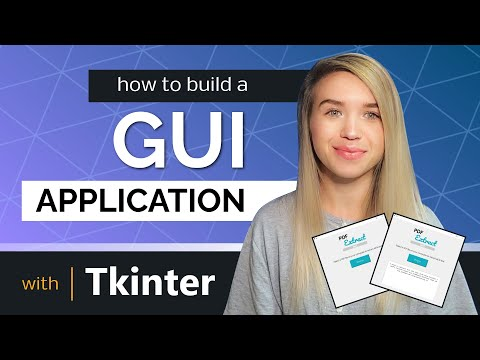

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("itRLRfuL_PQ")

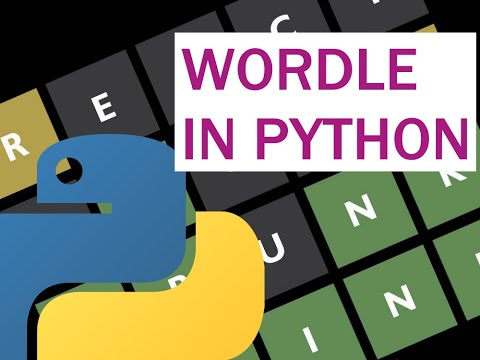

In [2]:
YouTubeVideo("9M1oDT_JLJk")

## Making the Computer Follow Clues

Another challenge is to develop an algorithm for having the computer efficiently converge to a correct answer (the hidden word), not be cheating, but by deducing as much from each feedback string (clue) as any human could.

The solution offerered in five_land.py may not be the best, but at least it works reliably.

In [3]:
from five_land import wordle

In [4]:
wordle()

5757
covey hayey NNNCC
covey muley NNNCC
covey dopey NCNCC
covey covey CCCCC
That's it!


In [5]:
wordle()

5757
chert wharf NCNCN
chert chord CCNCN
chert chirp CCNCN
chert churn CCNCN
chert chert CCCCC
That's it!


But where did we get a roster of 5-letter words to begin with.  And what else might we learn about such a file, in terms of Graph Theory for example.  Those are topics for [Research](ADS_research_1.ipynb).  Some of that research is echoed below.

We learned we could get a list of 5-letter words from what's called The Stanford GraphBase.

In [6]:
import requests, random
response = requests.get("https://www-cs-faculty.stanford.edu/~knuth/sgb-words.txt")
print(response.status_code)
# words
print((response.text[1000:1102]))

200
n
speed
women
metal
south
grass
scale
cells
lower
sleep
wrong
pages
ships
needs
rocks
eight
major
leve


In [7]:
words = response.text.split("\n")
"ships" in words

True

In [8]:
if "" in words:
    words.remove("")  # a specious spacer i.e. an unwanted blank line

This number 5757 turns out to be famous, and raised suspicions of the specious spacer above.

In [9]:
len(words)

5757

In [10]:
type(words)

list

Turning the list of 5757 words into a set, a native Python type, gives many benefits for free such as automatic dupe supression.  Sets do not contain duplicate elements.  Since we wish to "go fishing" for "unique fish" e.g. words one letter change away from each other, we need a way to not keep including the same words multiple times, as our "fishing algorithms" find them over and over.

In [11]:
word_set = set(words)

In [12]:
%time "ships" in words

CPU times: user 14 µs, sys: 6 µs, total: 20 µs
Wall time: 42 µs


True

In [13]:
%time "ships" in word_set

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


True

In [14]:
! ls -o wordkeep.txt

-rw-r--r--  1 mac  34542 Mar  4 18:54 wordkeep.txt


In [15]:
with open("wordkeep.txt", "w") as fileobj:
    fileobj.write(response.text)

`words` is still a list at this point, as we used `word_set` for the set type version.  Below, we go ahead and make `words` the set.  However `random.choice` does not work with set arguments. 

In [16]:
answer = random.choice(words)  # words is not yet a set
answer

'excel'

In [17]:
# a cell like this is useful of you are developing and interacting
# with the same module.  Unless you force a recompile, you may wind
# up interacting with old source code.

import wordle
import imp; imp.reload(wordle)

<module 'wordle' from '/Users/mac/Documents/elite_school/wordle.py'>

In [18]:
wordle.words_play(answer, show_answer=False)

What is your guess? >  CHARM


guess    : CHARM
clue     : PNNNN


What is your guess? >  WITCH


guess    : WITCH
clue     : NNNPN


What is your guess? >  ORCRE


That's not a real word, sorry.


What is your guess? >  CLUES


guess    : CLUES
clue     : PPNCN


What is your guess? >  EXCEL


guess    : EXCEL
clue     : CCCCC
You win!
See you soon!



In [19]:
answer

'excel'

In [20]:
c = 0
for word in words:
    print(word)
    if c > 20:
        break
    c += 1

which
there
their
about
would
these
other
words
could
write
first
water
after
where
right
think
three
years
place
sound
great
again


In [22]:
from five_land import roll_alpha, fish_pond

In [23]:
p = roll_alpha('jingo')
p

{'bingo', 'dingo', 'jings', 'lingo'}

In [24]:
type(words)

list

In [25]:
words = set(words)

In [26]:
p

{'bingo', 'dingo', 'jings', 'lingo'}

In [27]:
new_p = fish_pond(p)
while len(new_p) > len(p):
    p = new_p
    new_p = fish_pond(p)
    print(len(p), len(new_p))

19 62
62 194
194 545
545 1216
1216 2045
2045 2640
2640 3133
3133 3624
3624 4020
4020 4263
4263 4390
4390 4451
4451 4476
4476 4484
4484 4487
4487 4489
4489 4490
4490 4492
4492 4493
4493 4493


In [28]:
never_reached = words - p

In [29]:
"yogic" in never_reached

True

In [30]:
len(never_reached)

1264

In [31]:
"nuked" in never_reached

False

In [32]:
"naked" in never_reached

False

In [33]:
len(never_reached), len(p)

(1264, 4493)

In [34]:
"spasm" in never_reached

True